# Regresja liniowa

Zamiast:
<p>$$  A x =  b$$</p>
<p>rozwiązujemy</p>
<p>$$ A^T A x = A^T b.$$</p>
<p>Inaczej mówiąc, niech błąd:</p>
<p>$$  r=b-A x$$</p>
<p>leży w lewym jądrze operatora A:</p>
<p>$$A^T r =A^T( b-Ax) = A^T b-A^TAx = 0.$$</p>
<p> </p>
<p>$$ A^T A x = A^T b.$$</p>
<ol> </ol>

Można też zarządać znikania gradientu kwadratu odchylenia:

$$ \frac{\partial}{\partial x_k} (A_{ij} x_j - b_i) (A_{il} x_l - b_i) = 0$$ 
$$  A_{ij} \delta_{jk} (A_{il} x_l - b_i) + A_{il} \delta_{lk} (A_{ij} x_j - b_i) =0 $$
$$ A^TAx - A^T b + A^TAx - A^T b =0 $$
$$ A^TAx - A^T b  =0 $$

In [1]:
%matplotlib notebook
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
import numpy as np 
import matplotlib.pyplot as plt



In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

Macierz $A$ dla regresji liniowej wynosi:

In [4]:
import numpy as np 
M = np.vstack([np.ones_like(train_X),train_X]).T
M

array([[  1.   ,   3.3  ],
       [  1.   ,   4.4  ],
       [  1.   ,   5.5  ],
       [  1.   ,   6.71 ],
       [  1.   ,   6.93 ],
       [  1.   ,   4.168],
       [  1.   ,   9.779],
       [  1.   ,   6.182],
       [  1.   ,   7.59 ],
       [  1.   ,   2.167],
       [  1.   ,   7.042],
       [  1.   ,  10.791],
       [  1.   ,   5.313],
       [  1.   ,   7.997],
       [  1.   ,   5.654],
       [  1.   ,   9.27 ],
       [  1.   ,   3.1  ]])

In [5]:
print (np.dot(M.T,M))

print(np.dot(M.T,train_Y))

[[  17.        105.893   ]
 [ 105.893     752.797217]]
[  40.226     274.017544]


Współczynniki dokładnie będą wynosiły:

In [6]:
c = np.linalg.solve(np.dot(M.T,M),np.dot(M.T,train_Y))
c

array([ 0.79880123,  0.25163494])

<IPython.core.display.Javascript object>


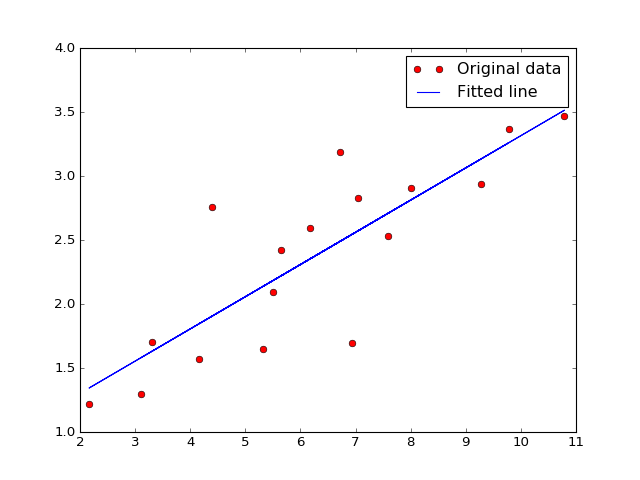

In [7]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, c[1] * train_X + c[0], label='Fitted line')
plt.legend()


In [8]:
plt.close()

## Optymalizacja metodą iteracyjną,

Nie zakładamy, że mamy problem regresji liniowej.

Używamy: https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html

In [9]:
from scipy.optimize import minimize

In [10]:
def cost(c,x=train_X,y=train_Y):
    return sum( (c[0]+x_*c[1]-y_)**2  for (x_,y_) in zip(x,y) )

In [11]:
cost([1,2])

2378.9392399999997

In [12]:
res = minimize(cost, [1,1], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 2.615580
         Iterations: 74
         Function evaluations: 143


In [13]:
res.x

array([ 0.79880122,  0.25163495])

In [14]:
x = np.linspace(-2,2,77)
y = np.linspace(-2,2,77)
X,Y = np.meshgrid(x,y)

In [15]:
cost([X,Y]).shape

(77, 77)

<IPython.core.display.Javascript object>


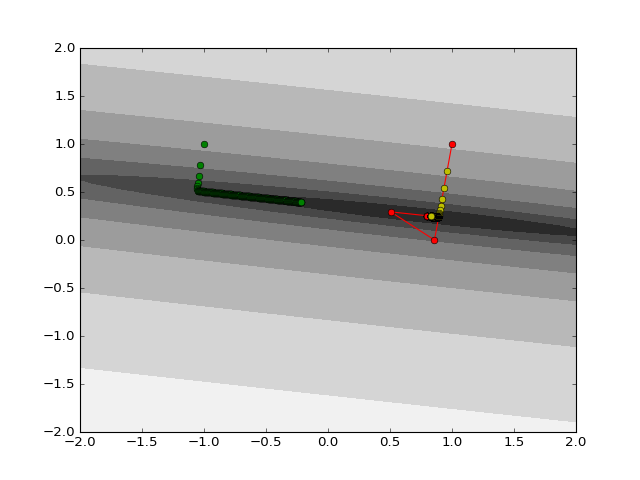

In [16]:
plt.contourf( X,Y,np.log(cost([X,Y])),cmap='gray')

In [17]:
plt.plot(res.x[0],res.x[1],'o')

In [18]:
np.min(cost([X,Y]))

2.6295925013850394

In [19]:
px=[]
py=[]
for i in range(20):
    res = minimize(cost, [1,1], options={ 'maxiter':i})
    px.append(res.x[0])
    py.append(res.x[1])
    print(res.x)

[ 1.  1.]
[  8.58602230e-01  -5.33339597e-05]
[ 0.50635615  0.29288537]
[ 0.79776745  0.25275645]
[ 0.79880289  0.25163344]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]
[ 0.79880156  0.25163489]


In [20]:
plt.plot(px,py,'ro-')

In [21]:
import sympy
from sympy.abc import x,y
sympy.init_printing(use_latex='mathjax')

In [22]:
f_symb = cost([x,y]).expand()

In [23]:
f_symb.diff(x)

34⋅x + 211.786⋅y - 80.452

In [24]:
F = sympy.lambdify((x,y),f_symb,np)
Fx = sympy.lambdify((x,y),f_symb.diff(x),np)
Fy = sympy.lambdify((x,y),f_symb.diff(y),np)
F(1,1),cost([1,1])

(456.7966770000001, 456.796677)

In [25]:
x0,y0 = -1,1

In [26]:
h = 0.01/(2*17) 

for i in range(500):
    plt.plot(x0,y0,'go')
    #print(i,x0,y0)
    x0 += -h * Fx(x0,y0)
    y0 += -h * Fy(x0,y0)


## Tensor flow - gradient descend

In [27]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(1.0, name="weight")
b = tf.Variable(1.0, name="bias")

In [28]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [29]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [30]:
# Initializing the variables
init = tf.global_variables_initializer()

In [31]:
# TEST
with tf.Session() as sess:
    sess.run(init)
    sess.run(tf.assign(W,1.0))
    sess.run(tf.assign(b,2.0))

    print(sess.run(b),sess.run(cost, feed_dict={X: train_X, Y: train_Y}))

2.0 18.798


In [32]:
# Launch the graph
x_tf_lst = [] 
y_tf_lst = [] 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

        x_tf_lst.append(sess.run(b))
        y_tf_lst.append(sess.run(W))
        
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    

Epoch: 0050 cost= 0.077450261 W= 0.237853 b= 0.885927
Epoch: 0100 cost= 0.077398203 W= 0.238551 b= 0.880904
Epoch: 0150 cost= 0.077352107 W= 0.239208 b= 0.876179
Epoch: 0200 cost= 0.077311262 W= 0.239826 b= 0.871736
Epoch: 0250 cost= 0.077275090 W= 0.240407 b= 0.867556
Epoch: 0300 cost= 0.077243045 W= 0.240953 b= 0.863625
Epoch: 0350 cost= 0.077214651 W= 0.241467 b= 0.859929
Epoch: 0400 cost= 0.077189490 W= 0.24195 b= 0.856451
Epoch: 0450 cost= 0.077167191 W= 0.242405 b= 0.853181
Epoch: 0500 cost= 0.077147424 W= 0.242833 b= 0.850105
Epoch: 0550 cost= 0.077129908 W= 0.243235 b= 0.847212
Epoch: 0600 cost= 0.077114373 W= 0.243613 b= 0.84449
Epoch: 0650 cost= 0.077100597 W= 0.243969 b= 0.841932
Epoch: 0700 cost= 0.077088393 W= 0.244303 b= 0.839525
Epoch: 0750 cost= 0.077077568 W= 0.244618 b= 0.83726
Epoch: 0800 cost= 0.077067964 W= 0.244914 b= 0.835132
Epoch: 0850 cost= 0.077059433 W= 0.245192 b= 0.833129
Epoch: 0900 cost= 0.077051878 W= 0.245454 b= 0.831245
Epoch: 0950 cost= 0.077045158 W

In [33]:
plt.plot(x_tf_lst,y_tf_lst,'yo')